In [36]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import warnings
warnings.filterwarnings('ignore')

In [37]:
df = pd.read_csv('hexaco.csv', names=['Oaesa1','Corga2','Aforg1','Xsses1','Efear1','Hsinc1','Oinqu1','Cdili1','Agent4','Xsocb2','Eanxi1','Hfair1','Ocrea2','Cperf1','Aflex1','Xsoci2','Edepe3','Hgree2','Ounco2','Cprud2','Apati2','Xlive2','Esent1','Hmode2','Oaesa3','Corga3','Aforg3','Xsses3','Efear4','Hsinc4','Oinqu3','Cdili2','Agent5','Xsocb3','Eanxi4','Hfair4','Ocrea6','Cperf2','Aflex5','Xsoci3','Edepe6','Hgree4','Ounco5','Cprud3','Apati3','Xlive3','Esent2','Hmode3','Oaesa4','Corga6','Aforg7','Xsses5','Efear7','Hsinc5','Oinqu6','Cdili5','Agent6','Xsocb4','Eanxi6','Hfair6','Ocrea7','Cperf3','Aflex7','Xsoci5','Edepe7','Hgree5','Ounco6','Cprud4','Apati4','Xlive4','Esent3','Hmode6','Oaesa7','Corga8','Aforg8','Xsses8','Efear8','Hsinc6','Oinqu8','Cdili6','Agent7','Xsocb8','Eanxi8','Hfair8','Ocrea8','Cperf4','Aflex8','Xsoci6','Edepe8','Hgree7','Ounco8','Cprud8','Apati6','Xlive7','Esent7','Hmode8','Alt3','Alt4','Alt7','Alt8','Hsinc4X','Hfair4X','Hgree4X','Hmode4X','Efear4X','Eanxi4X','Edepe4X','Esent4X','Xsses4X','Xsocb4X','Xsoci4X','Xlive4X','Aforg4X','Agent4X','Aflex4X','Apati4X','Corga4X','Cdili4X','Cperf4X','Cprud4X','Oaesa4X','Oinqu4X','Ocrea4X','Ounco4X','Alt4x','hones16','emoti16','extra16','agree16','consc16','openn16','ContinentNum','Continent','Country','Age','Sex','Education','Major'])
df = df.drop([0])
df.head()

,Oaesa1,Corga2,Aforg1,Xsses1,Efear1,Hsinc1,Oinqu1,Cdili1,Agent4,Xsocb2,...,agree16,consc16,openn16,ContinentNum,Continent,Country,Age,Sex,Education,Major
1,2,4,3,4,2,3,3,5,4,4,...,3.6875,3.875,3.6875,1,NaN,1,24,1,3,1
2,5,2,4,2,1,3,4,5,2,2,...,2.6875,3.8125,4.4375,1,NaN,1,40,1,4,1
3,4,2,4,4,2,5,5,4,4,4,...,3.1875,3.75,4.375,1,NaN,1,42,1,3,1
4,1,3,2,2,3,4,4,4,2,2,...,2.6875,2.6875,3.125,1,NaN,1,35,1,3,1
5,4,5,4,4,4,3,4,4,4,4,...,3.875,3.875,3.9375,1,NaN,1,27,1,3,1


In [38]:
# removing extranneous data
df = df.drop(columns=['ContinentNum', 'Continent', 'Country', 'Age', 'Education'])
df.head()

,Oaesa1,Corga2,Aforg1,Xsses1,Efear1,Hsinc1,Oinqu1,Cdili1,Agent4,Xsocb2,...,Ounco4X,Alt4x,hones16,emoti16,extra16,agree16,consc16,openn16,Sex,Major
1,2,4,3,4,2,3,3,5,4,4,...,4,4.75,2.9375,2.375,3.0625,3.6875,3.875,3.6875,1,1
2,5,2,4,2,1,3,4,5,2,2,...,5,3.25,3.0625,2.6875,3.5,2.6875,3.8125,4.4375,1,1
3,4,2,4,4,2,5,5,4,4,4,...,4.25,5,4.5625,2.875,3.8125,3.1875,3.75,4.375,1,1
4,1,3,2,2,3,4,4,4,2,2,...,3.5,3.25,2.9375,3.375,2.375,2.6875,2.6875,3.125,1,1
5,4,5,4,4,4,3,4,4,4,4,...,4.25,3.5,2.9375,2.75,3.6875,3.875,3.875,3.9375,1,1


In [39]:
# columns are mixed ints, floats, and strings
# convert everything to numbers
df = df.apply(pd.to_numeric)
df.dtypes

Oaesa1       int64
Corga2       int64
Aforg1       int64
Xsses1       int64
Efear1       int64
            ...   
agree16    float64
consc16    float64
openn16    float64
Sex          int64
Major        int64
Length: 133, dtype: object

In [40]:
df.describe()

,Oaesa1,Corga2,Aforg1,Xsses1,Efear1,Hsinc1,Oinqu1,Cdili1,Agent4,Xsocb2,...,Ounco4X,Alt4x,hones16,emoti16,extra16,agree16,consc16,openn16,Sex,Major
count,73385.000000,73385.000000,73385.000000,73385.000000,73385.000000,73385.000000,73385.000000,73385.000000,73385.000000,73385.000000,...,73385.000000,73385.000000,73385.000000,73385.000000,73385.000000,73385.000000,73385.000000,73385.000000,73385.000000,73385.000000
mean,3.634844,3.046276,2.684622,3.448947,2.563739,2.841562,3.874320,3.923472,2.909614,3.546065,...,3.743994,3.758517,3.272531,3.119592,3.237257,2.799539,3.532867,3.730150,1.482060,4.810275
std,1.140132,1.157903,1.176061,1.044399,1.189353,1.130993,1.087223,0.937315,1.206481,1.159465,...,0.662934,0.742946,0.745132,0.634061,0.645676,0.632384,0.563309,0.570729,0.512418,2.197059
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.062500,1.000000,0.000000,1.000000
25%,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,3.000000,2.000000,3.000000,...,3.250000,3.250000,2.812500,2.687500,2.812500,2.375000,3.187500,3.375000,1.000000,3.000000
50%,4.000000,3.000000,2.000000,4.000000,2.000000,3.000000,4.000000,4.000000,3.000000,4.000000,...,3.750000,3.750000,3.375000,3.125000,3.250000,2.812500,3.562500,3.812500,1.000000,5.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,...,4.250000,4.250000,3.812500,3.562500,3.687500,3.250000,3.937500,4.125000,2.000000,6.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.000000,8.000000


In [41]:
# the data was already clean, knew there are no missing values from SPSS
sum = df.isnull().sum()
percentage = (df.isnull().sum() / df.isnull().count())
pd.concat([sum, percentage], axis = 1, keys = ['Sum', 'Percentage'])

,Sum,Percentage
Oaesa1,0,0.0
Corga2,0,0.0
Aforg1,0,0.0
Xsses1,0,0.0
Efear1,0,0.0
...,...,...
agree16,0,0.0
consc16,0,0.0
openn16,0,0.0
Sex,0,0.0


In [42]:
# current size of data frame
print(f'Data Frame Shape (rows, columns): {df.shape}')

Data Frame Shape (rows, columns): (73385, 133)


In [43]:
# remove all values where sex was not given
df = (df[df['Sex'] != 0])
print(f'Data Frame Shape (rows, columns): {df.shape}')

Data Frame Shape (rows, columns): (72912, 133)


Text(0.5, 1.0, 'Major')

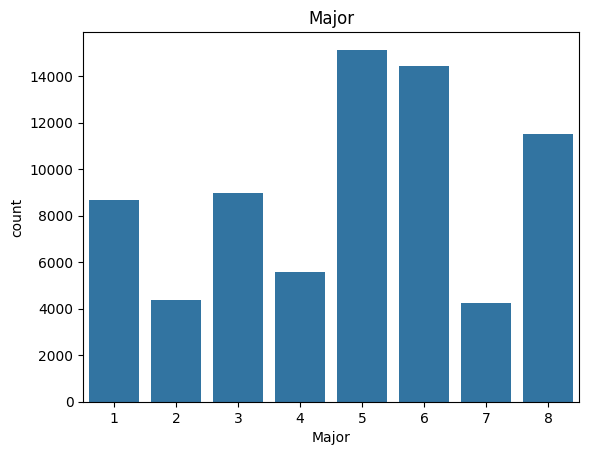

In [44]:
# distribution of major
sns.countplot(data=df, x="Major").set_title("Major")

Text(0, 0.5, 'correlation')

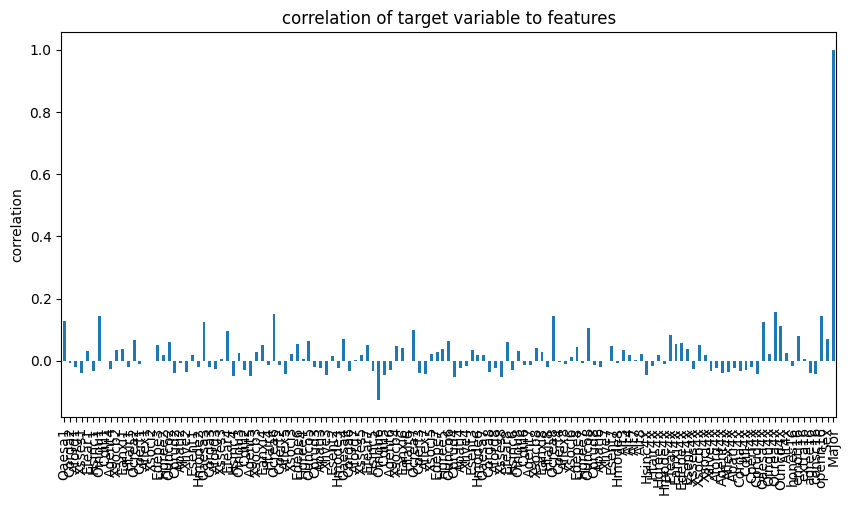

In [45]:
# it is obvious that no one data value will give us a prediction of major (except for the major data value, of course)
plt.figure(figsize=(10,5))
ax = df.corr()["Major"].plot(kind='bar',title='correlation of target variable to features')
ax.set_ylabel('correlation')

In [46]:
import tpot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix as cm

In [47]:
df.head()

,Oaesa1,Corga2,Aforg1,Xsses1,Efear1,Hsinc1,Oinqu1,Cdili1,Agent4,Xsocb2,...,Ounco4X,Alt4x,hones16,emoti16,extra16,agree16,consc16,openn16,Sex,Major
1,2,4,3,4,2,3,3,5,4,4,...,4.00,4.75,2.9375,2.3750,3.0625,3.6875,3.8750,3.6875,1,1
2,5,2,4,2,1,3,4,5,2,2,...,5.00,3.25,3.0625,2.6875,3.5000,2.6875,3.8125,4.4375,1,1
3,4,2,4,4,2,5,5,4,4,4,...,4.25,5.00,4.5625,2.8750,3.8125,3.1875,3.7500,4.3750,1,1
4,1,3,2,2,3,4,4,4,2,2,...,3.50,3.25,2.9375,3.3750,2.3750,2.6875,2.6875,3.1250,1,1
5,4,5,4,4,4,3,4,4,4,4,...,4.25,3.50,2.9375,2.7500,3.6875,3.8750,3.8750,3.9375,1,1


In [48]:
# create X and y variables
X = df.drop(columns=['Major'], axis=1)
y = df.Major

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=40)

In [49]:
# logistic regression
lr = LogisticRegression(random_state=40)
lr.fit(X_train, y_train)

LogisticRegression(random_state=40)

In [50]:
# get accuracy in train and in test sets
train_accuracy = lr.score(X_train, y_train)
test_accuracy = lr.score(X_test, y_test)
print('Accuracy in Train set   : {:.2f}'.format(train_accuracy), 
      'Accuracy in Test  set   : {:.2f}'.format(test_accuracy), sep='\n')

Accuracy in Train set   : 0.32
Accuracy in Test  set   : 0.30


In [51]:
# create TPOTClassifier for automated machine learning
AutoML = tpot.TPOTClassifier(
                            generations=5,
                            population_size=100,
                            offspring_size=None,
                            mutation_rate=0.9,
                            crossover_rate=0.1,
                            scoring=None,
                            cv=5,
                            subsample=1.0,
                            n_jobs=1,
                            max_time_mins=None,
                            max_eval_time_mins=5,
                            random_state=None,
                            config_dict=None,
                            template=None,
                            warm_start=False,
                            memory=None,
                            use_dask=False,
                            periodic_checkpoint_folder=None,
                            early_stop=None,
                            verbosity=2,
                            disable_update_check=False,
                            )

In [52]:
# call fit to find the highest-scoring pipeline and train on the train sets
AutoML.fit(X_train,y_train)

Version 0.12.1 of tpot is outdated. Version 0.12.2 was released Friday February 23, 2024.


                                                                                    
Generation 1 - Current best internal CV score: 0.31186879358019526
                                                                                    
Generation 2 - Current best internal CV score: 0.31186879358019526
                                                                                    
Generation 3 - Current best internal CV score: 0.3126916698221957
                                                                                    
Generation 4 - Current best internal CV score: 0.3126916698221957
                                                                                  
Generation 5 - Current best internal CV score: 0.316069108547676
                                                              
Best pipeline: LogisticRegression(VarianceThreshold(RobustScaler(input_matrix), threshold=0.01), C=5.0, dual=False, penalty=l2)


TPOTClassifier(generations=5, verbosity=2)

In [53]:
# create TPPTClassifier for automated machine learning
AutoML = tpot.TPOTClassifier(
                            generations=5,
                            population_size=100,
                            offspring_size=None,
                            mutation_rate=0.9,
                            crossover_rate=0.1,
                            scoring=None,
                            cv=5,
                            subsample=1.0,
                            n_jobs=1,
                            max_time_mins=None,
                            max_eval_time_mins=5,
                            random_state=None,
                            config_dict=None,
                            template=None,
                            warm_start=False,
                            memory=None,
                            use_dask=False,
                            periodic_checkpoint_folder=None,
                            early_stop=None,
                            verbosity=2,
                            disable_update_check=False,
                            )

In [54]:
# call fit on X and y
AutoML.fit(X,y)

#save model 
with open('model.joblib', 'wb') as f:
    joblib.dump(lr,f)

Version 0.12.1 of tpot is outdated. Version 0.12.2 was released Friday February 23, 2024.


                                                                                    
Generation 1 - Current best internal CV score: 0.30095176327544654
                                                                                    
Generation 2 - Current best internal CV score: 0.30523086588394505
                                                                                    
Generation 3 - Current best internal CV score: 0.30523086588394505
                                                                                    
Generation 4 - Current best internal CV score: 0.30523086588394505
                                                                                  
Generation 5 - Current best internal CV score: 0.30523086588394505
                                                               
Best pipeline: LogisticRegression(StandardScaler(input_matrix), C=0.01, dual=False, penalty=l2)


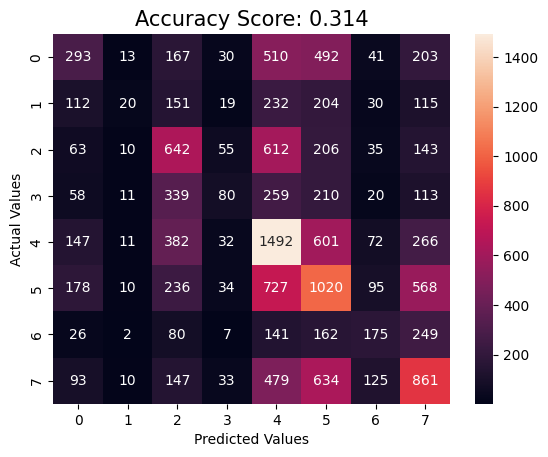

In [55]:
# confusion matrix for accuracy 
# compares the predicted values versus the actual values
predictions = AutoML.predict(X_test)
score = round(accuracy_score(y_test, predictions), 3)
cm1 = cm(y_test, predictions)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()

In [56]:
# export to pipeline4.py (for df4)
AutoML.export('pipeline.py')